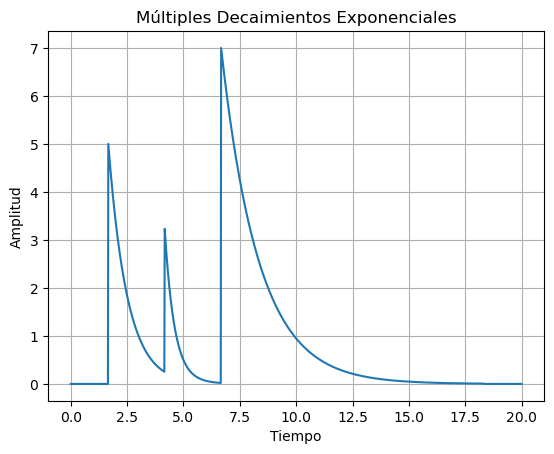

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de tiempo
t = np.linspace(0, 20, 1000)  # Intervalo de tiempo

# Parámetros de los decaimientos exponenciales
amplitudes = [5, 3, 7]  # Amplitudes de cada decaimiento
taus = [1, 0.5, 2]  # Constantes de decaimiento (anchos)
shifts = [0, 3, 6]  # Desplazamientos en el tiempo para cada decaimiento

# Generar el array de múltiples decaimientos exponenciales
signal = np.zeros_like(t)
for A, tau, shift in zip(amplitudes, taus, shifts):
    signal += A * np.exp(-(t - shift) / tau) * (t >= shift)  # Agregar solo después del tiempo de desplazamiento

zeros = np.zeros(100)

signal = np.concatenate((zeros, signal, zeros))
t = np.linspace(0, 20, len(signal))
# Graficar la señal
plt.plot(t, signal)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Múltiples Decaimientos Exponenciales')
plt.grid(True)
plt.show()

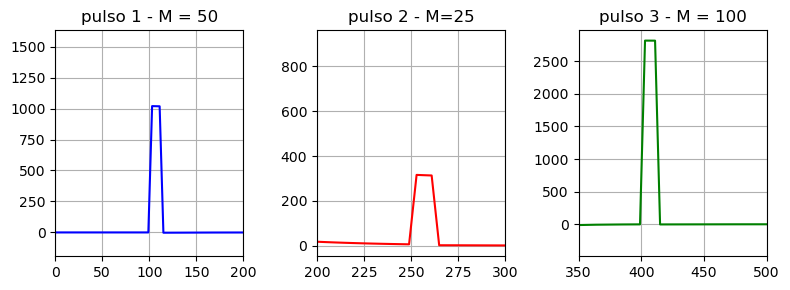

In [99]:
import numpy as np

# Parámetros iniciales
K = 4  # Define el valor de K
L = 12  # Define el valor de L

# Calcula el valor de M 50 25 100
M = 25

def trap_shaper(input, K, L, M):
    # Señal de entrada (ejemplo)
    X = input

    # Inicialización de las variables
    aKL = np.zeros_like(X)
    b = np.zeros_like(X)
    c = np.zeros_like(X)
    y = np.zeros_like(X)

    # Implementación del filtro trapezoidal
    for n in range(max(K, L), len(X)):
        aKL[n] = X[n] - X[n - K] - X[n - L] + X[n - K - L]
        b[n] = b[n-1] + aKL[n]
        c[n] = b[n] + M * aKL[n]
        y[n] = y[n-1] + c[n]
    return y


# Crear la figura y los subplots
fig, axs = plt.subplots(1, 3, figsize=(8, 3))  # 3 filas, 1 columna

# Primer subplot
axs[0].plot(trap_shaper(signal, K, L, 50), color='b')
axs[0].set_title('pulso 1 - M = 50')
#axs[0].set_xlabel('Tiempo')
#axs[0].set_ylabel('Amplitud')
axs[0].set_xlim(0, 200)
axs[0].grid(True)

# Segundo subplot
axs[1].plot(trap_shaper(signal, K, L, 25), color='r')
axs[1].set_title('pulso 2 - M=25')
#axs[1].set_xlabel('Tiempo')
#axs[1].set_ylabel('Amplitud')
axs[1].set_xlim(200, 300)
axs[1].grid(True)

# Tercer subplot
axs[2].plot(trap_shaper(signal, K, L, 100), color='g')
axs[2].set_title('pulso 3 - M = 100')
#axs[2].set_xlabel('Tiempo')
#axs[2].set_ylabel('Amplitud')
axs[2].grid(True)
axs[2].set_xlim(350, 500)

# Ajustar el layout para evitar superposición
plt.tight_layout()

# Mostrar la figura
plt.show()

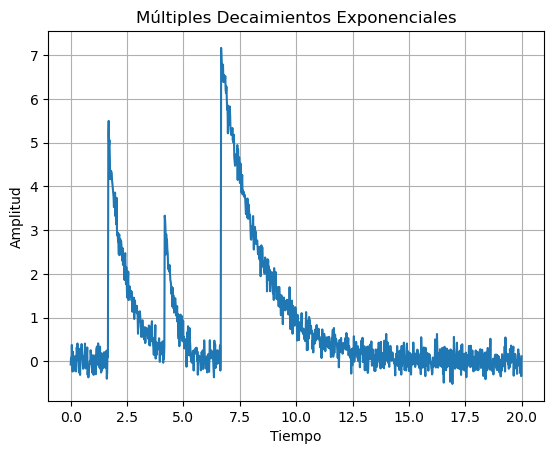

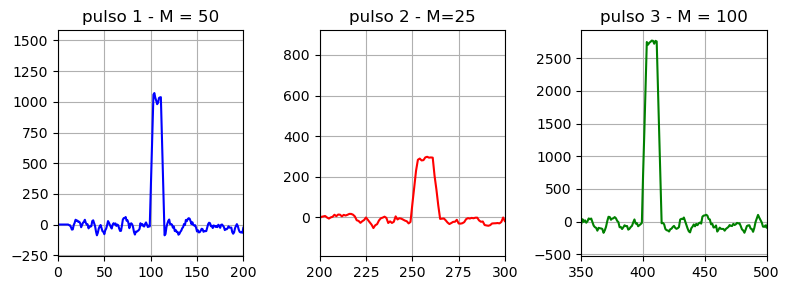

In [106]:
#Señal con ruido gaussiano

# Parámetros de tiempo
t = np.linspace(0, 20, 1000)  # Intervalo de tiempo

# Parámetros de los decaimientos exponenciales
amplitudes = [5, 3, 7]  # Amplitudes de cada decaimiento
taus = [1, 0.5, 2]  # Constantes de decaimiento (anchos)
shifts = [0, 3, 6]  # Desplazamientos en el tiempo para cada decaimiento

# Generar el array de múltiples decaimientos exponenciales
signal = np.zeros_like(t)
for A, tau, shift in zip(amplitudes, taus, shifts):
    signal += A * np.exp(-(t - shift) / tau) * (t >= shift)  # Agregar solo después del tiempo de desplazamiento

zeros = np.zeros(100)

signal = np.concatenate((zeros, signal, zeros))

# Parámetros del ruido gaussiano
mean = 0  # Media del ruido
std_dev = 0.2  # Desviación estándar del ruido

# Generar ruido gaussiano
noise = np.random.normal(mean, std_dev, size=signal.shape)

# Agregar el ruido a la señal
noisy_signal = signal + noise



t = np.linspace(0, 20, len(signal))
# Graficar la señal
plt.plot(t, noisy_signal)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Múltiples Decaimientos Exponenciales')
plt.grid(True)
plt.show()



# Crear la figura y los subplots
fig, axs = plt.subplots(1, 3, figsize=(8, 3))  # 3 filas, 1 columna

# Primer subplot
axs[0].plot(trap_shaper(noisy_signal, K, L, 50), color='b')
axs[0].set_title('pulso 1 - M = 50')
#axs[0].set_xlabel('Tiempo')
#axs[0].set_ylabel('Amplitud')
axs[0].set_xlim(0, 200)
axs[0].grid(True)

# Segundo subplot
axs[1].plot(trap_shaper(noisy_signal, K, L, 25), color='r')
axs[1].set_title('pulso 2 - M=25')
#axs[1].set_xlabel('Tiempo')
#axs[1].set_ylabel('Amplitud')
axs[1].set_xlim(200, 300)
axs[1].grid(True)

# Tercer subplot
axs[2].plot(trap_shaper(noisy_signal, K, L, 100), color='g')
axs[2].set_title('pulso 3 - M = 100')
#axs[2].set_xlabel('Tiempo')
#axs[2].set_ylabel('Amplitud')
axs[2].grid(True)
axs[2].set_xlim(350, 500)

# Ajustar el layout para evitar superposición
plt.tight_layout()

# Mostrar la figura
plt.show()
